In [110]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score, classification_report

import requests
from io import StringIO

### 데이터셋 로드

In [82]:
# GitHub의 raw 파일 URL
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/bc88f4907c93e5c4102f9a15b1a65e7c367a014f/titanic.csv"

# 파일 다운로드
response = requests.get(url)
response.raise_for_status()  # 요청이 성공했는지 확인

# 문자열 형태로 변환 후 DataFrame으로 로드
data = StringIO(response.text)
df = pd.read_csv("~/dev/gachon-ai/datasets/titanic.csv")

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 이상치 처리

In [84]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
df["Survived"].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

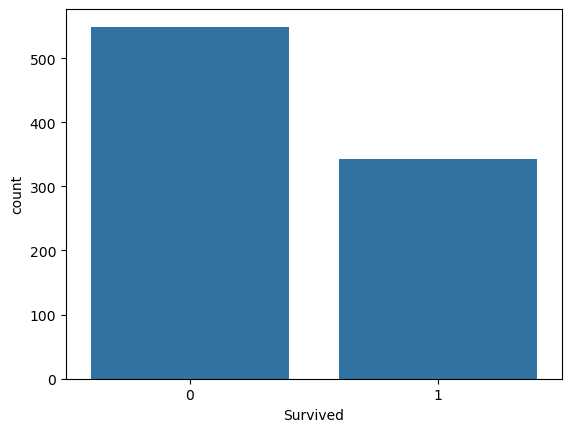

In [86]:
sns.countplot(df, x="Survived")

In [87]:
df = df.drop(["Cabin", "Name", "Embarked", "Ticket", "PassengerId"], axis=1)
df["Age"] = df["Age"].fillna(df["Age"].mean())

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [88]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [89]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [90]:
label_encoder = LabelEncoder()
columns_to_encode = ['Sex']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [91]:
df["Sex"].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [92]:
x = df.drop("Survived", axis=1)
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
x_test[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare
709,3,1,29.699118,1,1,15.2458
439,2,1,31.000000,0,0,10.5000
840,3,1,20.000000,0,0,7.9250
720,2,0,6.000000,0,1,33.0000
39,3,0,14.000000,1,0,11.2417


In [94]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

### 훈련 & 평가

- 순서대로 DT, RF, SVM, LR, KNN
- SVM, LR, KNN의 경우에는 StandardScaler 이용한 정규화 유무로 나누었음

In [95]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model.__class__} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

In [96]:
# 결정 트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
evaluate(dt, x_test, y_test)

<class 'sklearn.tree._classes.DecisionTreeClassifier'> Accuracy: 0.7709
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [97]:
# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
evaluate(rf, x_test, y_test)

<class 'sklearn.ensemble._forest.RandomForestClassifier'> Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [98]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [99]:
# 서포트 벡터 머신
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)
evaluate(svm, x_test, y_test)

<class 'sklearn.svm._classes.SVC'> Accuracy: 0.7821
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [100]:
# 서포트 벡터 머신(Scaled)
svmsc = SVC(kernel='linear', random_state=42)
svmsc.fit(x_train_scaled, y_train)
evaluate(svmsc, x_test_scaled, y_test)

<class 'sklearn.svm._classes.SVC'> Accuracy: 0.7821
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [101]:
# 로지스틱 회귀
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(x_train, y_train)
evaluate(lr, x_test, y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [102]:
# 로지스틱 회귀(Scaled)
lrsc = LogisticRegression(max_iter=200, random_state=42)
lrsc.fit(x_train_scaled, y_train)
evaluate(lrsc, x_test_scaled, y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [103]:
#K-최근접 이웃
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
evaluate(knn, x_test, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> Accuracy: 0.6816
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       105
           1       0.65      0.50      0.56        74

    accuracy                           0.68       179
   macro avg       0.67      0.65      0.66       179
weighted avg       0.68      0.68      0.67       179



In [104]:
#K-최근접 이웃(Scaled)
knnsc = KNeighborsClassifier(n_neighbors=3)
knnsc.fit(x_train_scaled, y_train)
evaluate(knnsc, x_test_scaled, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### 직접 예측하여 정답과 비교 

In [137]:
compare = np.array(y_test.array) == knnsc.predict(x_test_scaled)
compare

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [138]:
right = wrong = 0

for i in compare:
    if i == True: right += 1
    else: wrong += 1

print(f"샘플 중 {right}개 맞음, {wrong}개 틀림, 총 {compare.size}개 샘플 (acc: {(right / compare.size):.4f})")

샘플 중 144개 맞음, 35개 틀림, 총 179개 샘플 (acc: 0.8045)
